In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline
import xgboost as xgb
from sklearn.tree import export_graphviz
import graphviz,re
from xgboost import XGBRegressor

In [29]:
## From fastai library
def draw_tree(t, df, size=10, ratio=0.6, precision=1):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

In [30]:
np.random.randn(1)

array([0.3771129])

In [31]:
n=365*11 # Pretend we have 4 years of time series

In [32]:
linear,trend,seasonality,noise=[],[],[],[]
for i in range(n):
    linear.append(1)
    trend.append((i**1)*0.001)
    seasonality.append(1.2*math.sin(math.pi*i*2/365))  ## 1 year as a cycle
   
    
linear=np.array(linear)
trend=np.array(trend)
seasonality=np.array(seasonality)
noise = (np.random.randn(n)).reshape(-1)*0.3

Text(0.5, 1.0, 'noise')

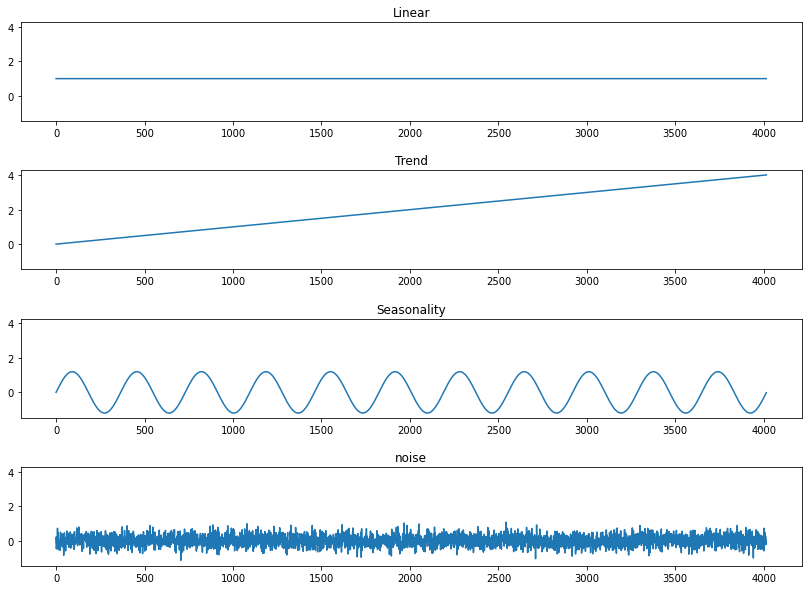

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharey=True,figsize=(14,10))
f.subplots_adjust(hspace=0.5)
ax1.plot(np.arange(n),linear)
ax2.plot(np.arange(n),trend)
ax3.plot(np.arange(n),seasonality)
ax4.plot(np.arange(n),noise)
ax1.set_title('Linear')
ax2.set_title('Trend')
ax3.set_title('Seasonality')
ax4.set_title('noise')

In [34]:
(linear+trend+seasonality+noise).shape

(4015,)

In [35]:
y=linear+trend+seasonality+noise
x=np.arange(n)

In [36]:
y=y.reshape(-1,1)
x=x.reshape(-1,1)

Text(0.5, 1.0, 'Fake Data')

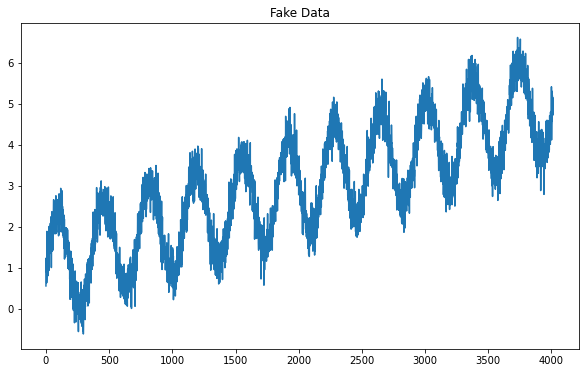

In [37]:
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Fake Data')

In [38]:
n_valid = 365*4

In [39]:
idx = np.random.random_integers(10)

C:\Users\adity\AppData\Local\Temp\ipykernel_47260\1432735017.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  idx = np.random.random_integers(10)


In [40]:

idx =np.arange(n)
print(idx)


[   0    1    2 ... 4012 4013 4014]


In [41]:
train_idx = idx[:-n_valid]
valid_idx = idx[-n_valid:]

In [42]:
# np.random.shuffle(train_idx)
# np.random.shuffle(valid_idx)

In [43]:
x_train = x[train_idx]
x_valid = x[valid_idx]
y_train = y[train_idx]
y_valid = y[valid_idx]

In [44]:


x_train.shape,y_train.shape,x_valid.shape,y_valid.shape



((2555, 1), (2555, 1), (1460, 1), (1460, 1))

In [45]:
x_train=pd.DataFrame(x_train,columns=['Date'])
x_valid=pd.DataFrame(x_valid,columns=['Date'])

In [46]:
m2 = XGBRegressor(max_depth=5)
m2.fit(x_train,y_train)
m2_predict = m2.predict(x_valid).reshape(-1,1)

In [47]:

m2_predict_train = m2.predict(x_train).reshape(-1,1)

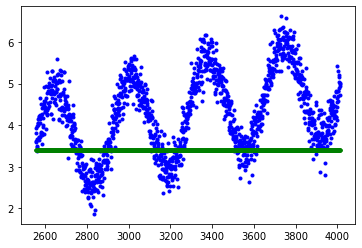

In [48]:
plt.plot(valid_idx,y_valid,'b.')
plt.plot(valid_idx, m2_predict,'g.')

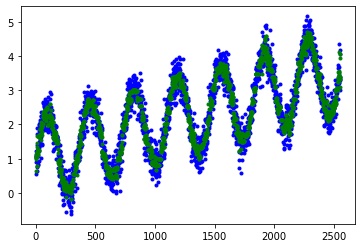

In [49]:
plt.plot(train_idx,y_train,'b.')
plt.plot(train_idx, m2_predict_train,'g.')

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LRModel = LinearRegression()

In [52]:
LRModel.fit(x_train, y_train)
lr_predict = LRModel.predict(x_valid)
lr_predict_train = LRModel.predict(x_train)

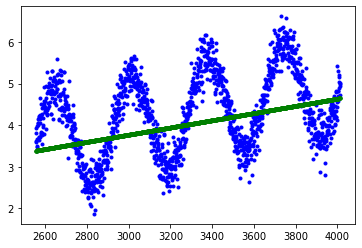

In [53]:
plt.plot(valid_idx, y_valid, 'b.')
plt.plot(valid_idx, lr_predict, 'g.')

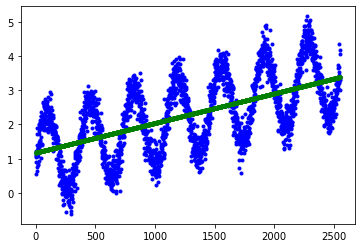

In [54]:
plt.plot(train_idx, y_train, 'b.')
plt.plot(train_idx, lr_predict_train, 'g.')